## Load and normalize MNIST dataset

In [1]:
%matplotlib inline

from __future__ import print_function

import torch
import torchvision
import torchvision.transforms as transforms


# Hyper-parameters
epochs = 10
batch_size = 8
lr = 0.01
momentum = 0.5

# Parameters
cuda = False  # default to False --> training and testing on CPU
log_step_percentage = 10

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
mnist_mean = 0.1307
mnist_std = 0.3081

# Initialize training set and testing set of MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mnist_mean,), (mnist_std,))
])

trainset = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST('data', train=False, transform=transform)

# Initialize dataloaders for training and testing
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


## Show some random training and testing images in MNIST

Training random samples:
    2     4     2     6     3     1     5     2

Testing random samples:
    7     2     1     0     4     1     4     9

<class 'torch.FloatTensor'>
torch.Size([8, 1, 28, 28])


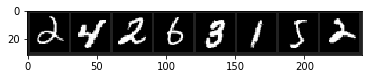

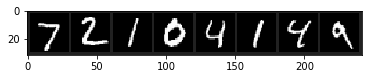

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Function to show an image
def imshow(img):
    img = img * mnist_std +  mnist_mean # unnormalize
    npimg = img.numpy()
    plt.figure()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# Get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))  # show images
print('Training random samples:')
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))  # print labels
print()

# Get some random testing images
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))  # show images
print('Testing random samples:')
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))  # print labels
print()

print(type(images))
print(images.shape)

## Define a Convolutional Neural Network - baseline

In [3]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class BaselineConvNet(nn.Module):
    def __init__(self):
        super(BaselineConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, kernel_size=3)
        self.fc1 = nn.Linear(108, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 4))
        x = x.view(-1, 108)
        x = self.fc1(x)
        return F.log_softmax(x)


baseline_conv_net = BaselineConvNet()

# Move the model to GPU if cuda set to True
if cuda:
    baseline_conv_net.cuda()
    

## Define a Convolutional Neural Network - advance
### - You should complete this part!!!

In [ ]:
class AdvanceConvNet(nn.Module):
    """
    Please implement this part by yourself
    """
    pass


advance_conv_net = AdvanceConvNet()

# Move the model to GPU if cuda set to True
if cuda:
    advance_conv_net.cuda()
    

## Define a loss function and optimizer

In [4]:
import torch.optim as optim


model = baseline_conv_net  # set the model to baseline_conv_net or the advanced one you implement

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


## Train and test the network
### - You should complete this part!!!

In [ ]:
log_interval = len(train_loader) / log_step_percentage

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if cuda:
            data, target = data.cuda(), target.cuda()

        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        
        """
        output = model(????)  # please fill in what you should pass into the model to derive the output
        loss = F.nll_loss(????, ????)  # please fill in what you should pass into the loss function to compute loss
        """

        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.data[0]))

def test():
    model.eval()
    test_loss = 0.
    correct = 0.
    for data, target in test_loader:
        if cuda:
            data, target = data.cuda(), target.cuda()
            
        data, target = Variable(data, volatile=True), Variable(target)
        
        """
        output = model(????)  # please fill in what you should pass into the model to derive the output
        loss = F.nll_loss(????, ????, size_average=False)  # please fill in what you should pass into the loss function
                                                           # to compute loss
        test_loss += loss.data[0]  # sum up batch loss
        """
        
        pred = output.data.max(1, keepdim=True)[1]  # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss,
                                                                                 correct,
                                                                                 len(test_loader.dataset),
                                                                                 100. * correct / len(test_loader.dataset)))
    
for epoch in range(1, epochs + 1):
    train(epoch)
    test()
    

## Test the network on custom test data
### - You should complete this part!!!

In [ ]:
from os import listdir
from os.path import isfile, join
from PIL import Image


custom_test_root = 'data/custom_test'  # the directory where custom test handwritten digit images are stored

files = sorted([f for f in listdir(custom_test_root) if isfile(join(custom_test_root, f))])
for i, img_name in enumerate(files, 1):
    full_img_path = join(custom_test_root, img_name)
    with Image.open(full_img_path).convert('L') as img:
        img = img.resize((28, 28), Image.BILINEAR)

        plt.figure()
        plt.imshow(img, cmap='gray')

        img_tensor = transform(img)  # use the defined composed transform functions to transform our custom test image
        img_tensor.unsqueeze_(0)  # Add batch dimension to the image data

        """
        Implement this part on your own~
        """

        print(img_name, '- prediction -->', pred)
